In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
dataframe = pd.read_csv('aircraft_sensor_data.csv')
print("Shape of the dataset : ",dataframe.shape)
print("\nFirst 5 rows : ")
print(dataframe.head(5))
print("\nLast 5 rows : ")
print(dataframe.tail(5))
print("\nColumns present : \n",dataframe.columns)
print("\nData-type : ",dataframe.dtypes)
print("\nData description : ",dataframe.describe().round(2))

Shape of the dataset :  (4000, 5)

First 5 rows : 
   Engine Rotation Speed  Engine Temperature  Engine Vibration   Noise  Risk
0               20835.67              572.96              1.35  129.57     0
1               19061.72              618.59              1.01  124.05     0
2               20583.75              578.28              1.01  116.30     0
3               27652.75              813.05              1.85  132.56     0
4               20347.70              565.77              1.17  125.98     0

Last 5 rows : 
      Engine Rotation Speed  Engine Temperature  Engine Vibration   Noise  \
3995               27849.84              764.65              2.37  141.85   
3996               20947.75              985.49              1.26  129.66   
3997               27862.85              953.66              3.73  140.50   
3998               27705.65              784.59              2.91  128.66   
3999               27632.52              772.91              3.03  139.80   

      Ri

In [2]:
print("Number of null values : ",dataframe.isna().sum())

Number of null values :  Engine Rotation Speed    0
Engine Temperature       0
Engine Vibration         0
Noise                    0
Risk                     0
dtype: int64


In [3]:
print("Distribution of Risk column : ",dataframe['Risk'].value_counts(normalize=True))

Distribution of Risk column :  Risk
0    0.6
1    0.4
Name: proportion, dtype: float64


In [4]:
dataframe.corr()['Risk']

Engine Rotation Speed    0.107213
Engine Temperature       0.621441
Engine Vibration         0.612957
Noise                    0.354852
Risk                     1.000000
Name: Risk, dtype: float64

Scatter Plot between Speed and Vibration


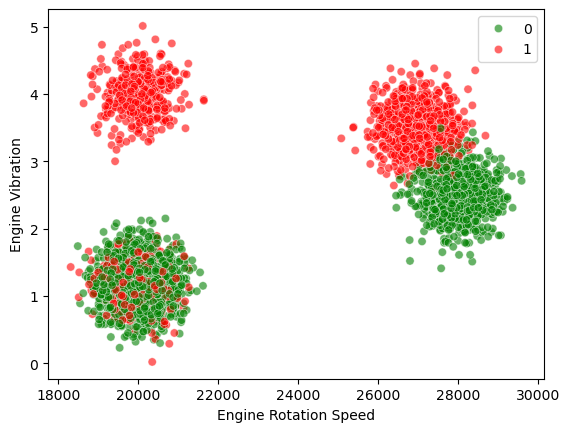

In [5]:
print("Scatter Plot between Speed and Vibration")
sns.scatterplot(data=dataframe,x='Engine Rotation Speed',y='Engine Vibration',hue='Risk',palette={0:'green',1:'red'},alpha=0.6)
plt.legend()
plt.show()

Scatter Plot between Temperature and Vibration


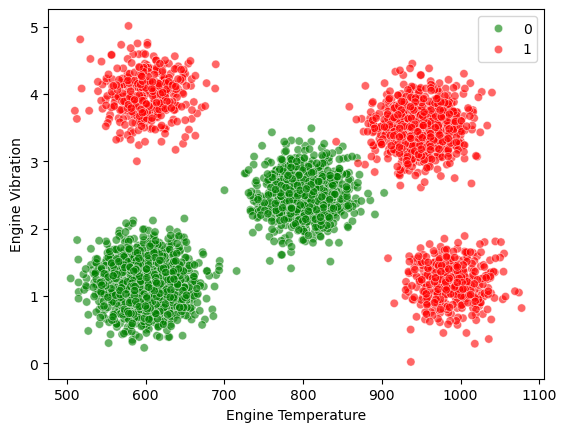

In [6]:
print("Scatter Plot between Temperature and Vibration")
sns.scatterplot(data=dataframe,x='Engine Temperature',y='Engine Vibration',hue='Risk',palette={0:'green',1:'red'},alpha=0.6)
plt.legend()
plt.show()

Scatter Plot between Temperature and Engine Rotation Speed


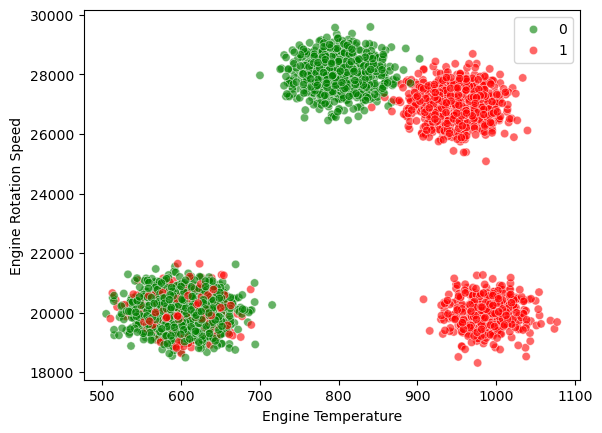

In [7]:
print("Scatter Plot between Temperature and Engine Rotation Speed")
sns.scatterplot(data=dataframe,x='Engine Temperature',y='Engine Rotation Speed',hue='Risk',palette={0:'green',1:'red'},alpha=0.6)
plt.legend()
plt.show()

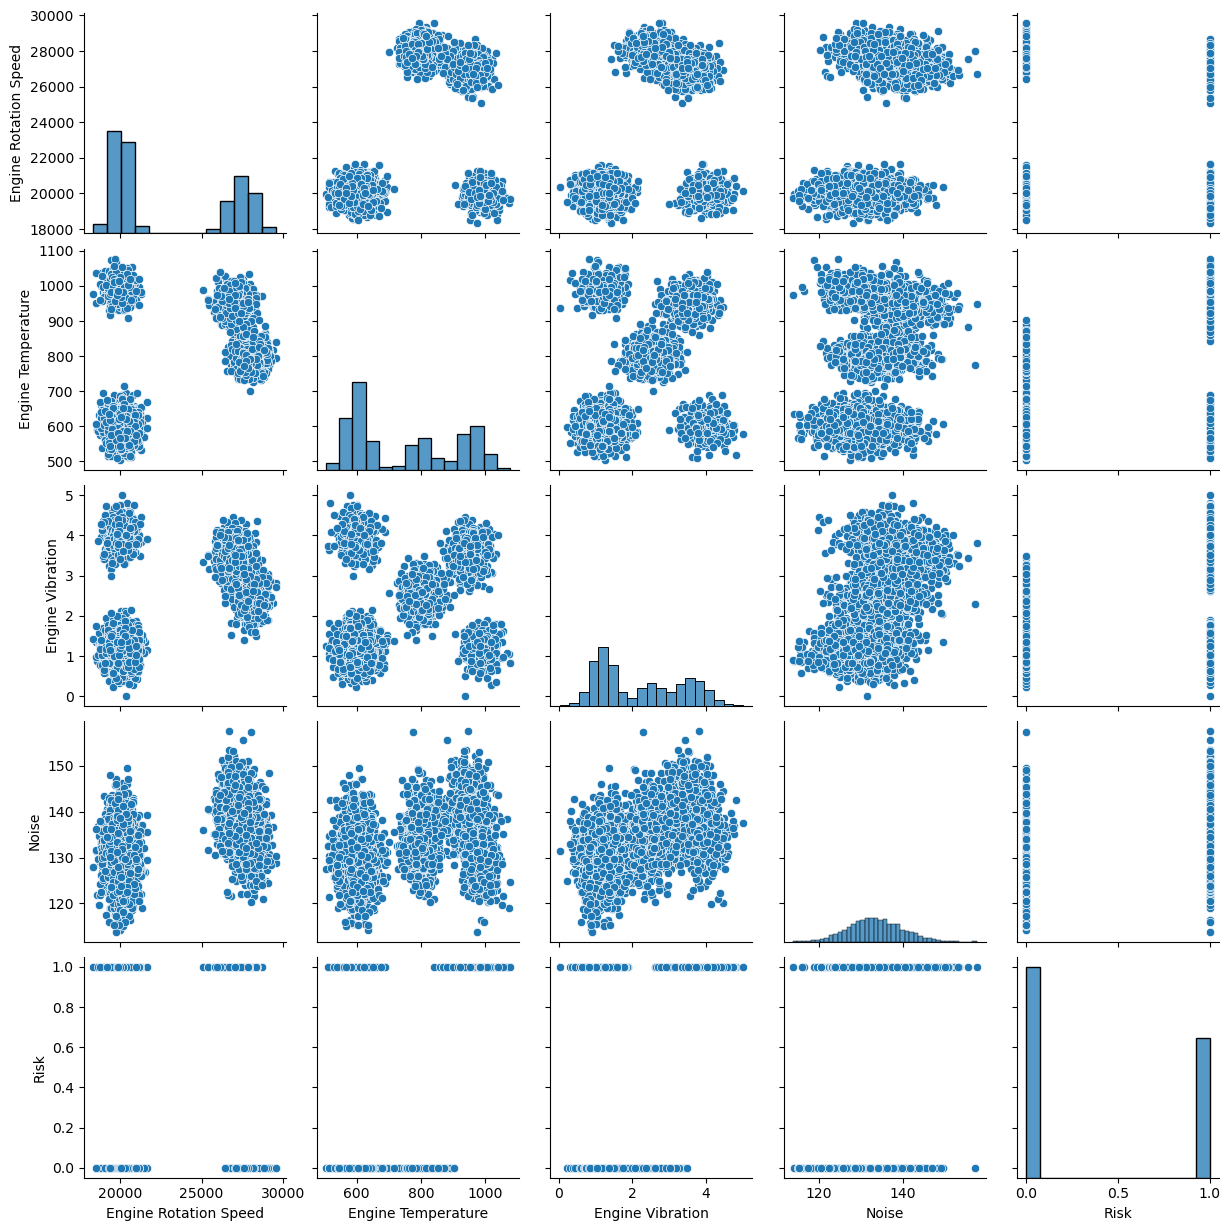

In [8]:
sns.pairplot(dataframe)

In [9]:
def detectOutlier(column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = dataframe[(dataframe[column]<lower)|(dataframe[column]>upper)]
    return len(outliers)
print("Engine Rotation Speed : ",detectOutlier('Engine Rotation Speed'))
print("Engine Vibration : ",detectOutlier('Engine Vibration'))
print("Noise : ",detectOutlier('Noise'))
print("Enginr Temperature : ",detectOutlier('Engine Temperature'))


Engine Rotation Speed :  0
Engine Vibration :  0
Noise :  28
Enginr Temperature :  0


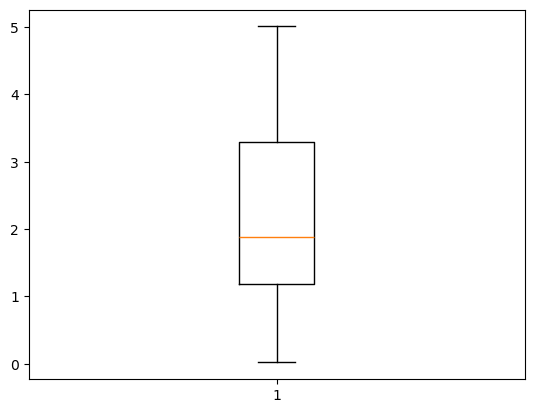

In [10]:
plt.boxplot(dataframe['Engine Vibration'])
plt.show()

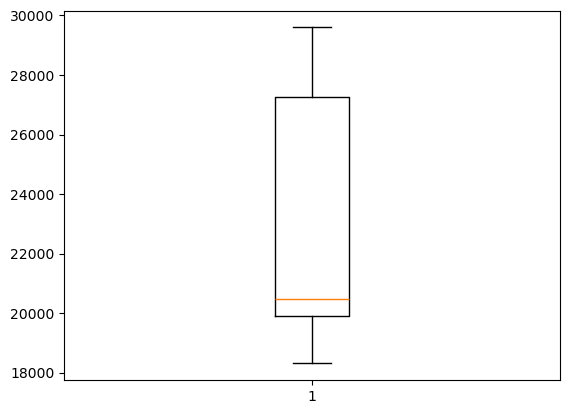

In [11]:
plt.boxplot(dataframe['Engine Rotation Speed'])
plt.show()

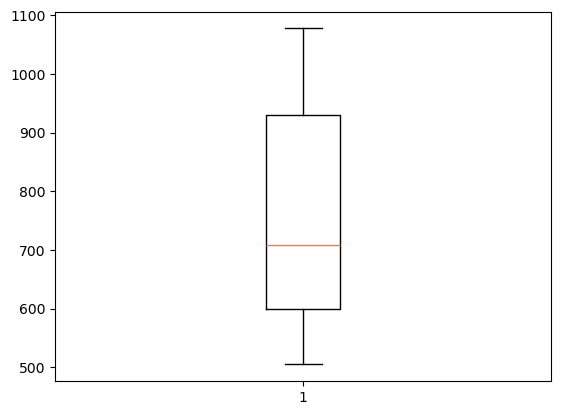

In [12]:
plt.boxplot(dataframe['Engine Temperature'])
plt.show()

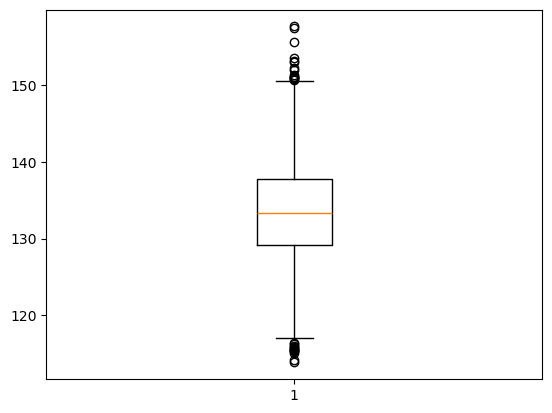

In [13]:
plt.boxplot(dataframe['Noise'])
plt.show()

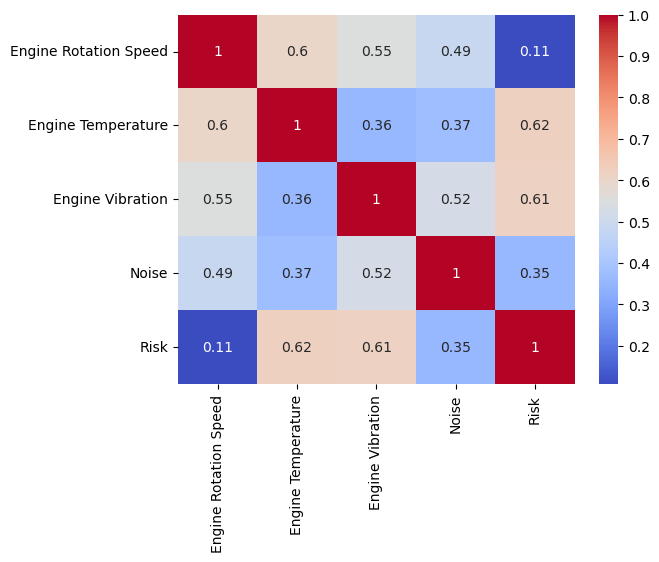

In [14]:
sns.heatmap(dataframe.corr(),cmap='coolwarm',annot=True)
plt.show()

In [15]:
#Comparision between pandas and polars
import time
df_pandas = pd.concat([dataframe]*1000,ignore_index=True)
df_pandas.shape
start = time.time()
res = df_pandas[df_pandas['Engine Rotation Speed']>20000].groupby('Risk')[['Engine Vibration','Engine Temperature']].mean()
end = time.time()
print(res)
print("\nExecution time of pandas : ",end-start)
df_polars = pl.from_pandas(df_pandas)
start = time.time()
res_polars = df_polars.filter(pl.col('Engine Rotation Speed')>20000).group_by('Risk').agg([pl.col('Engine Vibration').mean(),pl.col('Engine Temperature').mean()])
end = time.time()
print(res_polars)
print("\nExecution time of polars : ",end-start)

      Engine Vibration  Engine Temperature
Risk                                      
0             1.835386          698.911117
1             3.217001          896.072924

Execution time of pandas :  0.24002599716186523
shape: (2, 3)
┌──────┬──────────────────┬────────────────────┐
│ Risk ┆ Engine Vibration ┆ Engine Temperature │
│ ---  ┆ ---              ┆ ---                │
│ i64  ┆ f64              ┆ f64                │
╞══════╪══════════════════╪════════════════════╡
│ 0    ┆ 1.835386         ┆ 698.911117         │
│ 1    ┆ 3.217001         ┆ 896.072924         │
└──────┴──────────────────┴────────────────────┘

Execution time of polars :  0.11543464660644531


In [16]:
#Working with polars
data = pl.from_pandas(dataframe)
data.tail()
result = data.filter(pl.col('Engine Rotation Speed')>20000).group_by("Risk").agg(pl.col("Engine Vibration").mean(),pl.col('Engine Temperature').max())
print(result)

shape: (2, 3)
┌──────┬──────────────────┬────────────────────┐
│ Risk ┆ Engine Vibration ┆ Engine Temperature │
│ ---  ┆ ---              ┆ ---                │
│ i64  ┆ f64              ┆ f64                │
╞══════╪══════════════════╪════════════════════╡
│ 0    ┆ 1.835386         ┆ 902.87             │
│ 1    ┆ 3.217001         ┆ 1054.46            │
└──────┴──────────────────┴────────────────────┘


In [17]:
result = data.group_by('Risk').agg(pl.col('Engine Temperature').max().alias('Max-Temperature'),pl.col('Engine Temperature').min().alias('Min-Temperature'))
print("The maximum and minimum Temperature at High Risk and No Risk : ",result)

The maximum and minimum Temperature at High Risk and No Risk :  shape: (2, 3)
┌──────┬─────────────────┬─────────────────┐
│ Risk ┆ Max-Temperature ┆ Min-Temperature │
│ ---  ┆ ---             ┆ ---             │
│ i64  ┆ f64             ┆ f64             │
╞══════╪═════════════════╪═════════════════╡
│ 0    ┆ 902.87          ┆ 504.89          │
│ 1    ┆ 1077.42         ┆ 510.19          │
└──────┴─────────────────┴─────────────────┘


In [18]:
result = data.group_by('Risk').agg(pl.col('Engine Vibration').max().alias('Max-Vibration'),pl.col('Engine Vibration').min().alias('Min-Vibration'))
print("The maximum and minimum Vibration at High Risk and No Risk : ",result)

The maximum and minimum Vibration at High Risk and No Risk :  shape: (2, 3)
┌──────┬───────────────┬───────────────┐
│ Risk ┆ Max-Vibration ┆ Min-Vibration │
│ ---  ┆ ---           ┆ ---           │
│ i64  ┆ f64           ┆ f64           │
╞══════╪═══════════════╪═══════════════╡
│ 0    ┆ 3.49          ┆ 0.23          │
│ 1    ┆ 5.01          ┆ 0.02          │
└──────┴───────────────┴───────────────┘


In [19]:
pip install great_expectations

Note: you may need to restart the kernel to use updated packages.


In [33]:
import great_expectations as gx
context = gx.get_context()
assert type(context).__name__ == "EphemeralDataContext"
data_source = context.data_sources.add_pandas(name="aircraft")
data_asset = data_source.add_dataframe_asset(name="aircraft_asset")
batch_definition_name = "aircraft_batch"
batch_definition = data_asset.add_batch_definition_whole_dataframe(batch_definition_name)
assert batch_definition.name == batch_definition_name
batch_parameters = {"dataframe": dataframe}
batch = batch_definition.get_batch(batch_parameters=batch_parameters)
expectation_suite_name = "aircraft_suite"
suite = gx.ExpectationSuite(name=expectation_suite_name)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToNotBeNull(column="Engine Vibration")
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeBetween(column="Engine Temperature",min_value=400,max_value=1100)
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeBetween(column="Engine Rotation Speed",min_value=0,max_value=40000)
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToNotBeNull(column="Engine Temperature")
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToNotBeNull(column="Engine Rotation Speed")
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToNotBeNull(column="Noise")
)
suite.add_expectation(  
    gx.expectations.ExpectColumnValuesToBeInSet(column="Risk", value_set=[0,1])
)
context.suites.add(suite)
validation_result = batch.validate(suite)
print(validation_result)

# 1. Create a named Validation Definition
# Note: Use 'data=' for the batch and 'suite=' for the expectations
validation_definition_name = "aircraft_validation_run"
validation_definition = context.validation_definitions.add(
    gx.ValidationDefinition(
        name=validation_definition_name,
        data=batch_definition,  # Corrected from batch_definition
        suite=suite             # Corrected from expectation_suite
    )
)

# 2. Define the Checkpoint using the named definition
checkpoint_name = "aircraft_checkpoint"
checkpoint = context.checkpoints.add(
    gx.Checkpoint(
        name=checkpoint_name,
        validation_definitions=[validation_definition],
        result_format={"result_format": "SUMMARY"}
    )
)

# 3. Run the Checkpoint
# Use the batch parameters to inject your current dataframe
checkpoint_result = checkpoint.run(batch_parameters={"dataframe": dataframe})

# 4. Generate the HTML report
context.build_data_docs()
context.open_data_docs()

Calculating Metrics:   0%|          | 0/43 [00:00<?, ?it/s]

{
  "success": true,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_not_be_null",
        "kwargs": {
          "batch_id": "aircraft-aircraft_asset",
          "column": "Engine Vibration"
        },
        "meta": {},
        "id": "cb6f7152-45eb-4b1b-af23-11efc93b6eeb",
        "severity": "critical"
      },
      "result": {
        "element_count": 4000,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "partial_unexpected_list": [],
        "partial_unexpected_counts": [],
        "partial_unexpected_index_list": []
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_traceback": null,
        "exception_message": null
      }
    },
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_be_between",
        "kwargs": {
          "batch_id": "aircraft-aircraft_asset",
          "column": "E

Calculating Metrics:   0%|          | 0/43 [00:00<?, ?it/s]

In [21]:
from sklearn.model_selection import train_test_split
X = dataframe.drop("Risk",axis=1)
Y = dataframe['Risk']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
X


,Engine Rotation Speed,Engine Temperature,Engine Vibration,Noise
0,20835.67,572.96,1.35,129.57
1,19061.72,618.59,1.01,124.05
2,20583.75,578.28,1.01,116.30
3,27652.75,813.05,1.85,132.56
4,20347.70,565.77,1.17,125.98
...,...,...,...,...
3995,27849.84,764.65,2.37,141.85
3996,20947.75,985.49,1.26,129.66
3997,27862.85,953.66,3.73,140.50
3998,27705.65,784.59,2.91,128.66


In [23]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    1
3997    1
3998    0
3999    0
Name: Risk, Length: 4000, dtype: int64

In [24]:
X_train

,Engine Rotation Speed,Engine Temperature,Engine Vibration,Noise
3994,27030.39,1007.79,3.52,145.89
423,27785.08,785.40,2.91,137.80
2991,20565.26,990.92,1.66,127.37
1221,28728.55,766.28,2.31,125.42
506,19320.71,567.61,0.59,129.49
...,...,...,...,...
1130,19989.55,603.52,1.58,127.04
1294,28055.54,768.65,2.85,134.26
860,20586.72,591.82,1.10,132.50
3507,20200.12,606.05,0.89,130.23


In [25]:
X_test

,Engine Rotation Speed,Engine Temperature,Engine Vibration,Noise
555,20132.13,598.79,1.42,130.47
3491,19381.29,603.28,1.60,131.57
527,20050.93,646.47,0.83,122.66
3925,27566.71,810.47,3.49,138.48
2989,28172.81,908.00,3.47,134.10
...,...,...,...,...
1922,19774.99,637.71,1.04,131.79
865,19892.02,628.12,1.69,136.56
3943,19507.10,591.48,1.56,134.47
1642,28373.53,760.36,3.43,135.14


In [26]:
Y_train

3994    1
423     0
2991    1
1221    0
506     0
       ..
1130    0
1294    0
860     0
3507    0
3174    1
Name: Risk, Length: 3200, dtype: int64

In [27]:
Y_test

555     0
3491    0
527     0
3925    0
2989    1
       ..
1922    0
865     0
3943    0
1642    0
2483    0
Name: Risk, Length: 800, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_squared_error,mean_absolute_error
model_pipeline = Pipeline([('scaler',StandardScaler()),('classifier',LogisticRegression())])
model_pipeline.fit(X_train,Y_train)
prediction = model_pipeline.predict(X_test)
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)
classification = classification_report(Y_test,prediction)
print(classification)
print("Mean Square Error : ",mean_squared_error(Y_test,prediction))
print("Mean Absolute Error : ",mean_absolute_error(Y_test,prediction))
print("r2_score : ",r2_score(Y_test,prediction))

0.99875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       1.00      1.00      1.00       321

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Mean Square Error :  0.00125
Mean Absolute Error :  0.00125
r2_score :  0.9947970525302584


In [29]:
from sklearn.ensemble import RandomForestClassifier
model_pipeline2 = Pipeline([('scaler',StandardScaler()),('classifier',RandomForestClassifier())])
model_pipeline2.fit(X_train,Y_train)
predictions = model_pipeline2.predict(X_test)
print("Accuracy : ",accuracy_score(Y_test,predictions))
print(classification_report(Y_test,predictions))
print("Mean Square Error : ",mean_squared_error(Y_test,predictions))
print("Mean Absolute Error : ",mean_absolute_error(Y_test,predictions))
print("r2_score : ",r2_score(Y_test,predictions))

Accuracy :  0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       0.99      1.00      1.00       321

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Mean Square Error :  0.0025
Mean Absolute Error :  0.0025
r2_score :  0.9895941050605168


In [30]:
import joblib
joblib.dump(model_pipeline,'vibration_xai.pkl')
joblib.dump(model_pipeline2,'engine_vibration_xai.pkl')

['engine_vibration_xai.pkl']